<a href="https://colab.research.google.com/github/KimaruThagna/data-science-in-pycaret/blob/main/regression_in_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret scikit-learn==0.23.2 shap pandas

Import dataset from github.
The dataset is real estate data from **Better Data Science** Youtube channel.


In [2]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/betterdatascience/YouTube/master/data/RealEstate.csv')
dataset


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
dataset.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

#Dataset cleaning and preparation

In [4]:
dataset.drop(['No','X1 transaction date' ], axis=1,inplace=True)
# rename for easier reference
dataset.columns = ['age','distance_to_MRT_station', 'convenience_store_count', 'latitude', 'longitude','price_per_unit_area']
dataset

,age,distance_to_MRT_station,convenience_store_count,latitude,longitude,price_per_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


Plot histogram to check for skewness of data on the pricing column

(array([ 28.,  95., 111., 115.,  52.,   9.,   3.,   0.,   0.,   1.]),
 array([  7.6 ,  18.59,  29.58,  40.57,  51.56,  62.55,  73.54,  84.53,
         95.52, 106.51, 117.5 ]),
 <a list of 10 Patch objects>)

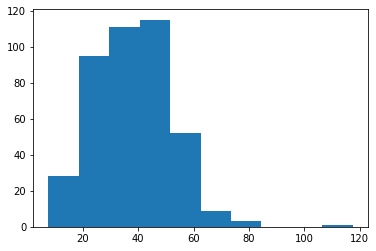

In [5]:
from matplotlib import pyplot as plt
plt.hist(dataset['price_per_unit_area'])

#Skewness detected.
From the histogram above, it can be observed that the data is generally skewed towards lower values. Maybe the very high value is an outlier. To reduce the impact of the skewness due to the outlier, we can filter out the outlier and replot the histogram

In [6]:
# drop higher values
dataset = dataset[dataset['price_per_unit_area']<=70]

Plot histogram to check distribution

(array([12., 24., 55., 57., 61., 84., 55., 38., 19.,  3.]),
 array([ 7.6 , 13.81, 20.02, 26.23, 32.44, 38.65, 44.86, 51.07, 57.28,
        63.49, 69.7 ]),
 <a list of 10 Patch objects>)

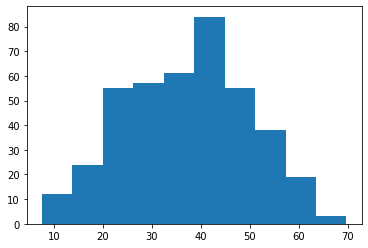

In [7]:
plt.hist(dataset['price_per_unit_area'])

Looks abit more natural and balanced. Almost the shape of the bell curve.
We can later add more techniques to inspect the dataset for skewness
## Model setup

In [8]:
from pycaret.regression import *
reg_setup = setup(dataset,target='price_per_unit_area',
                  numeric_imputation='mean',
                  categorical_features=['convenience_store_count'],
                  ignore_features=['latitude','longitude'],
                  normalize=True
                  )

,Description,Value
0,session_id,7806
1,Target,price_per_unit_area
2,Original Data,"(408, 6)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(285, 13)"


In [9]:
#checkout all models available
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


# Model comparison

In [10]:
compare_models()
'''
best = compare_models(sort = 'MAPE') #default is 'R2'
# compare specific models
best_specific = compare_models(whitelist = ['dt','rf','xgboost'])
# blacklist certain models
best_specific = compare_models(blacklist = ['catboost'])
# return top 3 models based on R2
top3 = compare_models(n_select = 3)
'''

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,4.8649,44.5780,6.5918,0.6914,0.1860,0.1503,0.717
rf,Random Forest Regressor,4.8761,45.8051,6.7078,0.6841,0.1900,0.1489,0.455
lightgbm,Light Gradient Boosting Machine,4.9103,45.5711,6.6713,0.6827,0.1970,0.1574,0.034
gbr,Gradient Boosting Regressor,4.9815,46.5234,6.7532,0.6784,0.1936,0.1555,0.055
xgboost,Extreme Gradient Boosting,5.0335,48.0732,6.8748,0.6722,0.1907,0.1514,0.627
et,Extra Trees Regressor,5.0639,49.6970,6.9882,0.6548,0.1930,0.1541,0.408
ada,AdaBoost Regressor,5.7947,56.7603,7.4874,0.6083,0.2377,0.2034,0.080
knn,K Neighbors Regressor,5.9856,67.6699,8.1383,0.5388,0.2375,0.1892,0.063
dt,Decision Tree Regressor,5.9158,67.2982,8.0972,0.5375,0.2420,0.1757,0.014
huber,Huber Regressor,6.1455,68.2788,8.0964,0.5345,0.2937,0.1997,0.021


"\nbest = compare_models(sort = 'MAPE') #default is 'R2'\n# compare specific models\nbest_specific = compare_models(whitelist = ['dt','rf','xgboost'])\n# blacklist certain models\nbest_specific = compare_models(blacklist = ['catboost'])\n# return top 3 models based on R2\ntop3 = compare_models(n_select = 3)\n"

In [11]:
best_model = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.0429,28.6903,5.3563,0.6721,0.1508,0.1215
1,4.8941,58.2078,7.6294,0.5977,0.3191,0.2623
2,5.0964,54.1561,7.3591,0.5400,0.1794,0.1214
3,4.0559,26.7808,5.1750,0.7767,0.1524,0.1171
4,5.5896,51.6412,7.1862,0.6868,0.1843,0.1621
5,4.9306,37.2890,6.1065,0.8211,0.1443,0.1292
6,4.3794,38.9523,6.2412,0.7795,0.1604,0.1351
7,4.0471,27.1315,5.2088,0.8309,0.1595,0.1331
8,5.8902,54.6544,7.3929,0.6979,0.2102,0.1748
9,5.7232,68.2766,8.2630,0.5117,0.1997,0.1463


# Tune model for better performance

In [12]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.1044,26.4654,5.1445,0.6975,0.1465,0.1245
1,4.5895,58.5754,7.6535,0.5952,0.3203,0.2578
2,5.4667,59.9341,7.7417,0.4909,0.2017,0.1354
3,4.0698,28.6526,5.3528,0.7611,0.1620,0.1193
4,4.8374,34.8192,5.9008,0.7888,0.1594,0.1422
5,4.8761,40.7221,6.3814,0.8046,0.1521,0.1299
6,4.3114,31.2063,5.5863,0.8233,0.1841,0.1521
7,4.3391,28.7815,5.3648,0.8206,0.1786,0.1518
8,5.4762,55.4109,7.4438,0.6938,0.2111,0.1596
9,5.5694,66.2967,8.1423,0.5259,0.2050,0.1485


Ensemle model and check performance

In [13]:
# bagging method
ensemble_model(best_model, method='Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.0258,30.1571,5.4915,0.6553,0.1559,0.1252
1,4.8852,58.8131,7.6690,0.5935,0.3213,0.2659
2,5.2926,55.1073,7.4234,0.5319,0.1850,0.1292
3,4.0350,28.7344,5.3604,0.7604,0.1500,0.1136
4,5.1370,42.0360,6.4835,0.7451,0.1695,0.1493
5,5.1941,43.1557,6.5693,0.7929,0.1581,0.1379
6,4.2594,34.1430,5.8432,0.8067,0.1601,0.1332
7,4.3453,29.2555,5.4088,0.8177,0.1695,0.1453
8,5.5053,52.0919,7.2175,0.7121,0.2064,0.1625
9,5.4665,68.4373,8.2727,0.5106,0.2030,0.1422


BaggingRegressor(base_estimator=<catboost.core.CatBoostRegressor object at 0x7f6adc972278>,
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                 random_state=7806, verbose=0, warm_start=False)

In [14]:
#boosting method
ensemble_model(best_model, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.2899,34.2848,5.8553,0.6082,0.1620,0.1311
1,4.8085,50.7978,7.1273,0.6489,0.3057,0.2514
2,5.3107,55.8166,7.4711,0.5259,0.1895,0.1302
3,4.0017,24.7294,4.9729,0.7938,0.1475,0.1162
4,5.5677,53.0102,7.2808,0.6785,0.1843,0.1624
5,4.3925,34.1588,5.8446,0.8361,0.1284,0.1069
6,4.6034,47.1172,6.8642,0.7332,0.1802,0.1456
7,4.2500,31.5821,5.6198,0.8032,0.1679,0.1346
8,5.9066,61.2458,7.8260,0.6615,0.2156,0.1653
9,5.5193,64.1259,8.0079,0.5414,0.1897,0.1380


AdaBoostRegressor(base_estimator=<catboost.core.CatBoostRegressor object at 0x7f6adc9754a8>,
                  learning_rate=1.0, loss='linear', n_estimators=10,
                  random_state=7806)

#Model visualization and Interpretation

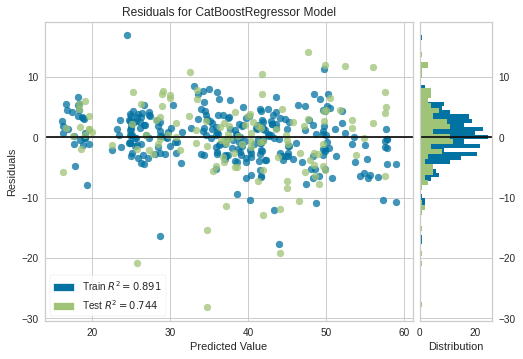

In [15]:
plot_model(tuned_model)

In [ ]:
evaluate_model(tuned_model)

#Model interpretation using SHAP

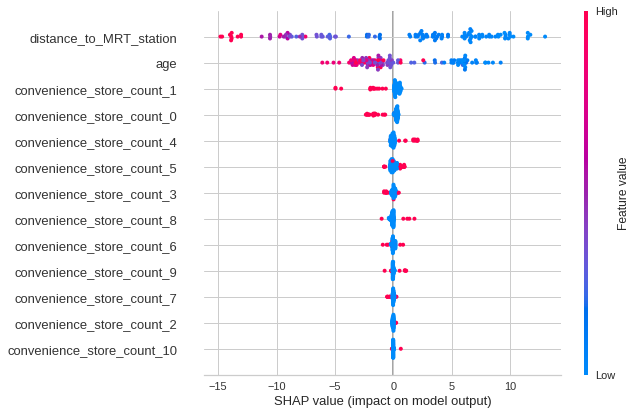

In [17]:
interpret_model(tuned_model)

# Interpreting SHAP image
- From the SHAP Image above, it is evident that low values of distance_to_MRT_station has a high positive impact and high values of the same have a high negative impact. MRT is massive rapid transport. Logically, the closer a house is to an MRT(small MRT distance value), the higher the price. There are some instances where the distance to MRT is low and still, a negative impact on the output is recorded. This could be such that the house is too close that its inhabitable maybe due to congestion or noise.
- In terms of age, newer houses(low age value) have a higher price per unit area.

- Convenience_store_count_x variable being categorical, red represents 1 and blue 0. For example, convinience_store_count_1 means there is 1 convenience store for that particular record where it will be indicated by 1(RED) and all other records will be 0(Blue). This is why most blue values are at SHAP value 0 since they do not affect output. They are just filler values.

- In this case, having a  TRUE under the column store_count_0 or store_count_1 impacts the model output negatively. Logically, we can deduce that houses without access to a convenience store or access to only one fetch lower prices.
The sweet spot seems to be at store_count_4 where a TRUE(red) positively impacts the output. Meaning, houses with access to around 4 convenience stores fetch a better price
- At store_count_10, most values are FALSE(blue) but 2 are TRUE(red) the number of convenience stores at this point has very little impact on house price. We can conclude that the optimum number of convenience stores is around 4 where any record that has this set to TRUE positively impacts the model.

# Model Evaluation and Saving

In [18]:
predictions = predict_model(tuned_model,data=dataset) 
# the predictions are made on the test/holdout set made during dataset setup
predictions

,age,distance_to_MRT_station,convenience_store_count,latitude,longitude,price_per_unit_area,Label
0,32.0,84.87882,10,24.98298,121.54024,37.9,42.524608
1,19.5,306.59470,9,24.98034,121.53951,42.2,43.534222
2,13.3,561.98450,5,24.98746,121.54391,47.3,41.954153
3,13.3,561.98450,5,24.98746,121.54391,54.8,41.954153
4,5.0,390.56840,5,24.97937,121.54245,43.1,50.272758
...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4,18.726085
410,5.6,90.45606,9,24.97433,121.54310,50.0,57.533468
411,18.8,390.96960,7,24.97923,121.53986,40.6,38.695405
412,8.1,104.81010,5,24.96674,121.54067,52.5,49.633351


# Finalize and save

In [19]:
finalize_model(tuned_model)

In [20]:
#save model
save_model(tuned_model, 'catboost_regressor')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['convenience_store_count'],
                                       display_types=True,
                                       features_todrop=['latitude', 'longitude'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='price_per_unit_area',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_...
                 ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='price_per_unit_area')),
                 ('fix_perfect', Remove_100(target='price_per_unit_area')),
                 ('clean_names', Clean_Colum_Names()),
                 ('fea